In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns

# import preproccesing libraries
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# import  ML models
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# import visualization's libraries
import graphviz
import pydot
from sklearn.tree import plot_tree

data = pd.read_excel('/content/drive/MyDrive/Tabla_GDP_1parcial.xlsx')

In [ ]:
df=pd.DataFrame(data)
df

,province,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap
0,Buenos Aires,2.926899e+08,1.383240,8.167798,5.511856,0.766168,48.7947,4.4,15625084,0.000006,0.004836
1,Catamarca,6.150949e+06,2.344140,9.234095,10.464484,0.951963,45.0456,1.5,367828,0.000005,0.004502
2,Córdoba,6.936374e+07,2.714140,5.382380,10.436086,1.035056,45.7640,4.8,3308876,0.000011,0.010175
3,Corrientes,7.968013e+06,NaN,12.747191,17.438858,3.864265,62.1103,5.9,992595,0.000004,0.004495
4,Chaco,9.832643e+06,7.517580,15.862619,31.479527,2.577462,65.5104,7.5,1055259,0.000003,0.003605
5,Chubut,1.774785e+07,1.548060,8.051752,8.044618,0.586309,39.5473,3.0,509108,0.000016,0.004498
6,Entre Ríos,2.074341e+07,3.185580,7.288751,18.794568,NaN,NaN,3.1,1235994,0.000006,0.004679
7,Formosa,3.807057e+06,4.610640,17.035583,28.004985,2.268974,65.8126,16.2,530162,0.000004,0.003440
8,Jujuy,NaN,2.151390,13.367965,12.483179,0.721295,54.1615,3.7,673307,0.000003,0.003958
9,La Pampa,6.990262e+06,1.539300,3.398774,16.505714,0.204093,45.4764,7.2,318951,0.000019,0.005415


In [ ]:
df.head()

,province,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap
0,Buenos Aires,2.926899e+08,1.38324,8.167798,5.511856,0.766168,48.7947,4.4,15625084,0.000006,0.004836
1,Catamarca,6.150949e+06,2.34414,9.234095,10.464484,0.951963,45.0456,1.5,367828,0.000005,0.004502
2,Córdoba,6.936374e+07,2.71414,5.382380,10.436086,1.035056,45.7640,4.8,3308876,0.000011,0.010175
3,Corrientes,7.968013e+06,NaN,12.747191,17.438858,3.864265,62.1103,5.9,992595,0.000004,0.004495
4,Chaco,9.832643e+06,7.51758,15.862619,31.479527,2.577462,65.5104,7.5,1055259,0.000003,0.003605


In [ ]:
df[['illiteracy','poverty','school_dropout']]

,illiteracy,poverty,school_dropout
0,1.383240,8.167798,0.766168
1,2.344140,9.234095,0.951963
2,2.714140,5.382380,1.035056
3,NaN,12.747191,3.864265
4,7.517580,15.862619,2.577462
5,1.548060,8.051752,0.586309
6,3.185580,7.288751,NaN
7,4.610640,17.035583,2.268974
8,2.151390,13.367965,0.721295
9,1.539300,3.398774,0.204093


# Preprocesamiento

In [ ]:
df.isnull().sum()

province                  0
gdp                       2
illiteracy                2
poverty                   0
deficient_infra           0
school_dropout            2
no_healthcare             2
birth_mortal              0
pop                       0
movie_theatres_per_cap    0
doctors_per_cap           0
dtype: int64

In [ ]:
df.dtypes

province                   object
gdp                       float64
illiteracy                float64
poverty                   float64
deficient_infra           float64
school_dropout            float64
no_healthcare             float64
birth_mortal              float64
pop                         int64
movie_theatres_per_cap    float64
doctors_per_cap           float64
dtype: object

In [ ]:
means = df.select_dtypes(include='float64').mean()

# Rellenar los valores nulos con la media de cada columna
df.fillna(means, inplace=True)

In [ ]:
df.isnull().sum()

province                  0
gdp                       0
illiteracy                0
poverty                   0
deficient_infra           0
school_dropout            0
no_healthcare             0
birth_mortal              0
pop                       0
movie_theatres_per_cap    0
doctors_per_cap           0
dtype: int64

In [ ]:
df

,province,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap
0,Buenos Aires,2.926899e+08,1.383240,8.167798,5.511856,0.766168,48.794700,4.4,15625084,0.000006,0.004836
1,Catamarca,6.150949e+06,2.344140,9.234095,10.464484,0.951963,45.045600,1.5,367828,0.000005,0.004502
2,Córdoba,6.936374e+07,2.714140,5.382380,10.436086,1.035056,45.764000,4.8,3308876,0.000011,0.010175
3,Corrientes,7.968013e+06,3.166403,12.747191,17.438858,3.864265,62.110300,5.9,992595,0.000004,0.004495
4,Chaco,9.832643e+06,7.517580,15.862619,31.479527,2.577462,65.510400,7.5,1055259,0.000003,0.003605
5,Chubut,1.774785e+07,1.548060,8.051752,8.044618,0.586309,39.547300,3.0,509108,0.000016,0.004498
6,Entre Ríos,2.074341e+07,3.185580,7.288751,18.794568,1.749807,50.391715,3.1,1235994,0.000006,0.004679
7,Formosa,3.807057e+06,4.610640,17.035583,28.004985,2.268974,65.812600,16.2,530162,0.000004,0.003440
8,Jujuy,3.277525e+07,2.151390,13.367965,12.483179,0.721295,54.161500,3.7,673307,0.000003,0.003958
9,La Pampa,6.990262e+06,1.539300,3.398774,16.505714,0.204093,45.476400,7.2,318951,0.000019,0.005415


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[['illiteracy','poverty','school_dropout']]=scaler.fit_transform(df[['illiteracy','poverty','school_dropout']])
df

,province,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap
0,Buenos Aires,2.926899e+08,-1.038651,-0.476036,5.511856,-0.881165,48.794700,4.4,15625084,0.000006,0.004836
1,Catamarca,6.150949e+06,-0.478949,-0.187273,10.464484,-0.714726,45.045600,1.5,367828,0.000005,0.004502
2,Córdoba,6.936374e+07,-0.263433,-1.230354,10.436086,-0.640290,45.764000,4.8,3308876,0.000011,0.010175
3,Corrientes,7.968013e+06,0.000000,0.764107,17.438858,1.894176,62.110300,5.9,992595,0.000004,0.004495
4,Chaco,9.832643e+06,2.534459,1.607794,31.479527,0.741431,65.510400,7.5,1055259,0.000003,0.003605
5,Chubut,1.774785e+07,-0.942647,-0.507462,8.044618,-1.042286,39.547300,3.0,509108,0.000016,0.004498
6,Entre Ríos,2.074341e+07,0.011170,-0.714090,18.794568,0.000000,50.391715,3.1,1235994,0.000006,0.004679
7,Formosa,3.807057e+06,0.841234,1.925444,28.004985,0.465081,65.812600,16.2,530162,0.000004,0.003440
8,Jujuy,3.277525e+07,-0.591222,0.932218,12.483179,-0.921364,54.161500,3.7,673307,0.000003,0.003958
9,La Pampa,6.990262e+06,-0.947750,-1.767533,16.505714,-1.384683,45.476400,7.2,318951,0.000019,0.005415


# Árbol de Regresión

In [ ]:
#Split de los datos en los conjuntos de entrenamiento y testeo
from sklearn.model_selection import train_test_split
x=pd.DataFrame(df,columns=['poverty','school_dropout'])      # Variables observables
y=pd.DataFrame(df,columns=['illiteracy']) # Variable Objetivo

#Particion del dataset con 20% datos para el conjunto de testing, 80% entrenamiento
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=1)

In [ ]:
print("x_train shape:",x_train.shape)
print("y_train shape:",y_train.shape)
print("x_test shape:",x_test.shape)
print("y_test shape:",y_test.shape)
y_test

x_train shape: (17, 2)
y_train shape: (17, 1)
x_test shape: (5, 2)
y_test shape: (5, 1)


,illiteracy
19,-0.693417
16,-0.118326
3,0.000000
13,-0.712167
18,-1.383335


## Modelo 1 (árbol sin podar)

### Entrenamiento

In [ ]:
model1 =DecisionTreeRegressor(criterion='squared_error', random_state=1)

modelTrained=model1.fit(x_train, y_train)

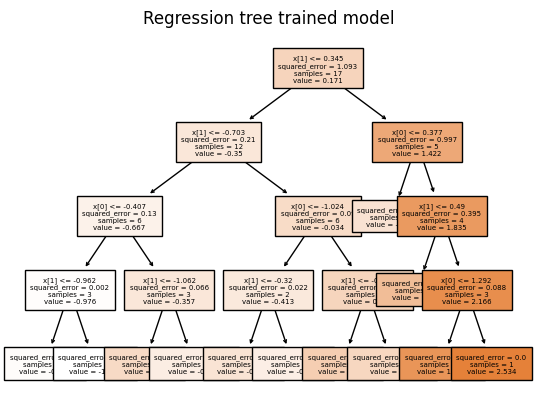

In [ ]:
from sklearn.tree import plot_tree
plt.figure()
plot_tree(modelTrained, filled=True, fontsize=5)
plt.title("Regression tree trained model")
plt.show()

### Predicción

In [ ]:
y_pred_model1=model1.predict(x_test)
y_pred_model1

array([ 1.80899012,  1.80899012, -0.2290259 ,  0.01117001, -0.9477497 ])

In [ ]:
d = {'valores reales': y_test['illiteracy'], 'valores predichos': y_pred_model1}
df_prediccion=pd.DataFrame(data=d)
df_prediccion

,valores reales,valores predichos
19,-0.693417,1.808990
16,-0.118326,1.808990
3,0.000000,-0.229026
13,-0.712167,0.011170
18,-1.383335,-0.947750


### Evaluación



In [ ]:
# 5. Evaluate predictions
mae=mean_absolute_error(y_test,y_pred_model1)
mse=mean_squared_error(y_test, y_pred_model1)
rmse=mse**(1/2.0)
print("The mean absolte error (MAE) on test set: {:.5f}".format(mae))  # error abs. promedio
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))  # error cuadratico medio
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse))

The mean absolte error (MAE) on test set: 1.16353
The mean squared error (MSE) on test set: 2.1484
The root mean squared error (RMSE) on test set: 1.4657


## Modelo 2 (árbol podado)

### Entrenamiento

In [ ]:
model2 =DecisionTreeRegressor (criterion='squared_error', random_state=1, max_depth=4)

modelTrained=model2.fit(x_train, y_train)

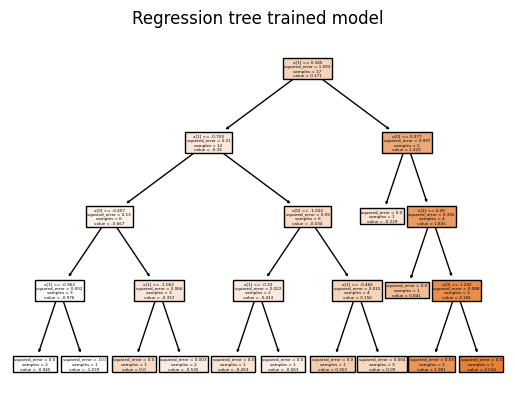

In [ ]:
from sklearn.tree import plot_tree
plt.figure()
plot_tree(modelTrained, filled=True)
plt.title("Regression tree trained model")
plt.show()

### Predicción

In [ ]:
y_pred_model2=model2.predict(x_test)
y_pred_model2

array([-0.2290259 , -0.2290259 ,  1.98136244,  0.09049945, -0.94519846])

In [ ]:
d = {'valores reales': y_test['illiteracy'], 'valores predichos': y_pred_model2}
df_prediccion=pd.DataFrame(data=d)
df_prediccion

,valores reales,valores predichos
19,-0.693417,-0.229026
16,-0.118326,-0.229026
3,0.000000,1.981362
13,-0.712167,0.090499
18,-1.383335,-0.945198


### Evaluación

In [ ]:
# 5. Evaluate predictions
mae=mean_absolute_error(y_test,y_pred_model2)
mse=mean_squared_error(y_test, y_pred_model2)
rmse=mse**(1/2.0)
print("The mean absolte error (MAE) on test set: {:.5f}".format(mae))  # error abs. promedio
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))  # error cuadratico medio
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse))

The mean absolte error (MAE) on test set: 0.75945
The mean squared error (MSE) on test set: 0.9980
The root mean squared error (RMSE) on test set: 0.9990
